# Downloading Data Of Netflix.

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [16]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import os

# Historical Daily Data of Netflix from 1st March,2020 to 1st March,2021.

In [3]:
initial_data = yf.download("NFLX", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
initial_data.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,373.109985,381.359985,364.500000,381.049988,381.049988,6997900
2020-03-03,381.029999,393.519989,367.399994,368.769989,368.769989,8364600
2020-03-04,377.769989,384.010010,370.510010,383.790009,383.790009,5487300
2020-03-05,381.000000,391.399994,368.640015,372.779999,372.779999,8747000
2020-03-06,367.700012,371.309998,356.850006,368.970001,368.970001,8147200


In [5]:
initial_data['Adj Close'].head()

Date
2020-03-02    381.049988
2020-03-03    368.769989
2020-03-04    383.790009
2020-03-05    372.779999
2020-03-06    368.970001
Name: Adj Close, dtype: float64

In [8]:
initial_data['Adj Close'].tail() 

Date
2021-02-22    533.780029
2021-02-23    546.150024
2021-02-24    553.409973
2021-02-25    546.700012
2021-02-26    538.849976
Name: Adj Close, dtype: float64

# Ploting movement of Stock NFLX over a period of one year.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

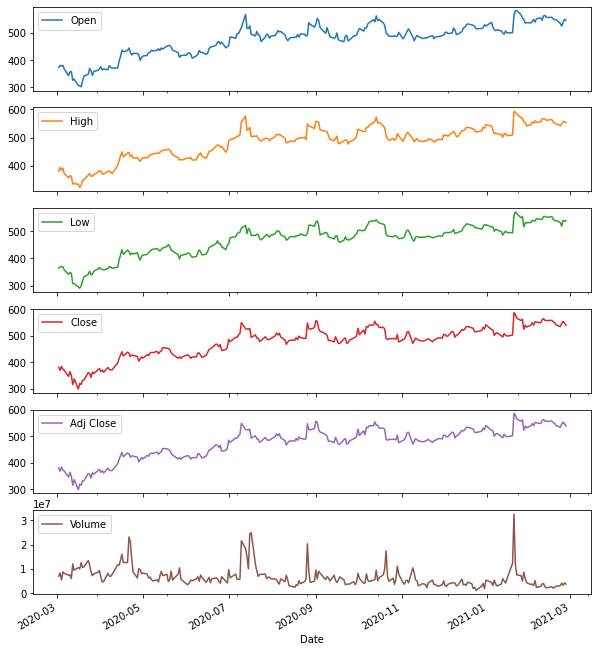

In [10]:
initial_data.plot(figsize=(10, 12), subplots=True)

# Summary Statistics

In [127]:
data.diff().describe().round(2)

count    250.00
mean       0.63
std       14.11
min      -44.23
25%       -6.66
50%        0.40
75%        8.03
max       84.57
Name: Adj Close, dtype: float64

In [128]:
data.pct_change().round(4).head()

Date
2020-03-02       NaN
2020-03-03   -0.0322
2020-03-04    0.0407
2020-03-05   -0.0287
2020-03-06   -0.0102
Name: Adj Close, dtype: float64

In [129]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

Date
2020-03-02       NaN
2020-03-03   -0.0328
2020-03-04    0.0399
2020-03-05   -0.0291
2020-03-06   -0.0103
Name: Adj Close, dtype: float64

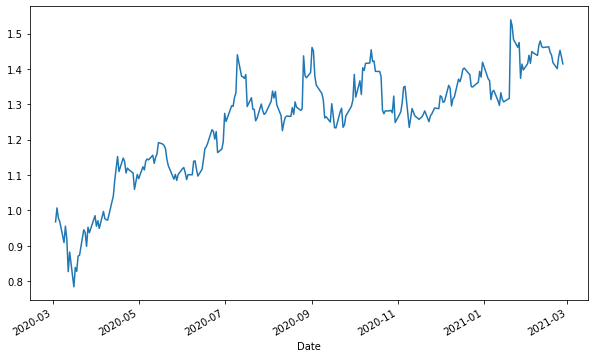

In [130]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

# Calculating 12M Volatility

In [131]:
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 48.53 %


# Calculating 6M Volatility

In [132]:
data1 = yf.download("NFLX", start="2020-09-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [133]:
log_return = np.log(data1['Adj Close'] /data1['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The 6 Months historical volatility is', round(vol_h*100,2), '%')

The 6 Months historical volatility is 44.63 %


# Monte Carlo Simulation

In [193]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [194]:
T = 1
r = 0.0167
sigma = 0.4463
S0 = 538.85
K = 540

In [195]:
S = mcs_simulation_np(1000)

In [196]:
S = np.transpose(S)
S

array([[538.85      , 537.95796111, 542.8714191 , ..., 487.0460089 ,
        484.42765501, 492.47600166],
       [538.85      , 543.36799094, 558.95867261, ..., 605.5627137 ,
        613.58058977, 607.68947263],
       [538.85      , 548.92346562, 550.15659876, ..., 399.29387554,
        417.26513714, 412.25625809],
       ...,
       [538.85      , 529.8517698 , 535.07790576, ..., 445.52129778,
        448.72736384, 443.7513354 ],
       [538.85      , 538.10344291, 549.02662579, ..., 368.86744061,
        365.17757535, 363.49273919],
       [538.85      , 536.71229105, 534.00975814, ..., 299.79392749,
        310.68703118, 312.92690635]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

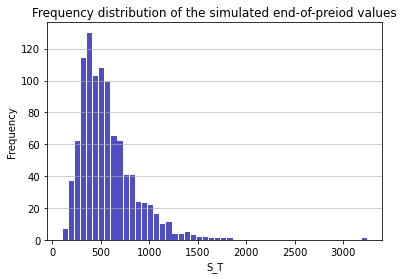

In [197]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [198]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 1.0


In [199]:
cp = (S[-1,:]  - K)>0
bpc = np.mean(np.maximum(cp.astype(int),0))
print('Binary call', str(bpc))

Binary call 0.0


In [200]:
bpc + bpp

1.0

# Black-Scholes Model

In [17]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    payoff == "put"
    option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value


In [18]:
euro_option_bs(538.85, 540, 1, 0.0167, 0.4463, 'put')

90.61567040874127

A range of change in stock price is defined from 500 - 600 (11 numbers). Calculating put option value with different spot price, other factors remaining the same. 

In [19]:
S = np.linspace(500,600,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 540, 1, 0.0167, 0.4463, 'put')

In [20]:
cp

array([[107.37568712],
       [102.81513073],
       [ 98.42830338],
       [ 94.21072674],
       [ 90.15781674],
       [ 86.26491206],
       [ 82.52730006],
       [ 78.94024018],
       [ 75.49898509],
       [ 72.19879952],
       [ 69.03497707]])

Different option prices are ploted at different spot price.

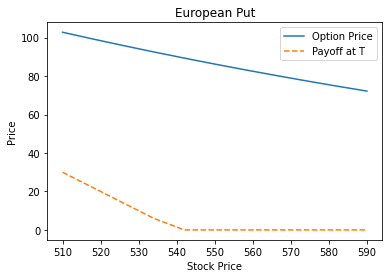

In [215]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(540-S,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Put')
plt.legend(['Option Price','Payoff at T'])

# Option Data
Downloading Put option data of NFLX expiring one year from now. 

In [216]:
NFLX = yf.Ticker("NFLX")
opt = NFLX.option_chain('2022-03-18')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,NFLX220318P00240000,2021-03-26 19:51:50,240.0,3.56,3.20,3.70,-0.170000,-4.557643,168.0,614,0.473882,False,REGULAR,USD
1,NFLX220318P00250000,2021-03-26 16:09:59,250.0,4.14,3.70,4.20,-0.160000,-3.720938,6.0,125,0.463812,False,REGULAR,USD
2,NFLX220318P00260000,2021-03-26 16:45:28,260.0,4.70,4.25,4.80,0.040000,0.858368,24.0,72,0.455084,False,REGULAR,USD
3,NFLX220318P00270000,2021-03-22 14:23:11,270.0,5.41,4.85,5.45,0.000000,0.000000,36.0,128,0.446295,False,REGULAR,USD
4,NFLX220318P00280000,2021-03-19 19:33:39,280.0,6.10,5.55,6.20,-0.900000,-12.857143,1.0,47,0.438330,False,REGULAR,USD
5,NFLX220318P00290000,2021-03-26 17:48:47,290.0,6.90,6.40,7.00,-0.300000,-4.166663,260.0,269,0.430120,False,REGULAR,USD
6,NFLX220318P00300000,2021-03-26 19:51:50,300.0,7.70,7.30,8.05,-0.620000,-7.451922,116.0,1173,0.424627,False,REGULAR,USD
7,NFLX220318P00310000,2021-03-26 16:07:23,310.0,9.00,8.35,9.15,1.060000,13.350124,1.0,212,0.418432,False,REGULAR,USD
8,NFLX220318P00320000,2021-03-22 15:11:17,320.0,9.09,9.55,10.30,0.000000,0.000000,5.0,114,0.411627,False,REGULAR,USD
9,NFLX220318P00330000,2021-03-22 14:23:58,330.0,11.62,10.90,11.90,0.000000,0.000000,24.0,127,0.408819,False,REGULAR,USD


Calculating volatility of data previously downloaded under 'data1' from 2020-09-01 to 2021-03-01

In [218]:
S = data1['Adj Close'][-1]
K = opt.puts['strike']
T = 1
r = 0.0167
q = 0.0000
log_return = np.log(data1['Adj Close'] / data1['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.44628975412088656

Calculating option price using Black Scholes and inserting a coulum of BSM Price in the put option data

In [221]:
NFLX_bsm_put = np.zeros((len(K),1))
for i in range(len(K)):
    NFLX_bsm_put [i] = euro_option_bs(S, K[i], T, r,vol, 'put')

In [222]:
opt.puts['BSMPrice'] = pd.DataFrame(NFLX_bsm_put)
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,NFLX220318P00240000,2021-03-26 19:51:50,240.0,3.56,3.20,3.70,-0.170000,-4.557643,168.0,614,0.473882,False,REGULAR,USD,1.964987
1,NFLX220318P00250000,2021-03-26 16:09:59,250.0,4.14,3.70,4.20,-0.160000,-3.720938,6.0,125,0.463812,False,REGULAR,USD,2.526129
2,NFLX220318P00260000,2021-03-26 16:45:28,260.0,4.70,4.25,4.80,0.040000,0.858368,24.0,72,0.455084,False,REGULAR,USD,3.195493
3,NFLX220318P00270000,2021-03-22 14:23:11,270.0,5.41,4.85,5.45,0.000000,0.000000,36.0,128,0.446295,False,REGULAR,USD,3.983477
4,NFLX220318P00280000,2021-03-19 19:33:39,280.0,6.10,5.55,6.20,-0.900000,-12.857143,1.0,47,0.438330,False,REGULAR,USD,4.900092
5,NFLX220318P00290000,2021-03-26 17:48:47,290.0,6.90,6.40,7.00,-0.300000,-4.166663,260.0,269,0.430120,False,REGULAR,USD,5.954847
6,NFLX220318P00300000,2021-03-26 19:51:50,300.0,7.70,7.30,8.05,-0.620000,-7.451922,116.0,1173,0.424627,False,REGULAR,USD,7.156654
7,NFLX220318P00310000,2021-03-26 16:07:23,310.0,9.00,8.35,9.15,1.060000,13.350124,1.0,212,0.418432,False,REGULAR,USD,8.513759
8,NFLX220318P00320000,2021-03-22 15:11:17,320.0,9.09,9.55,10.30,0.000000,0.000000,5.0,114,0.411627,False,REGULAR,USD,10.033681
9,NFLX220318P00330000,2021-03-22 14:23:58,330.0,11.62,10.90,11.90,0.000000,0.000000,24.0,127,0.408819,False,REGULAR,USD,11.723172


Calculating error = (Last exercise price - Theoretical BSM price)/ Theoretical BSM price

In [224]:
opt.puts['estimate_error'] = ((opt.puts['lastPrice'] - opt.puts['BSMPrice'])/opt.puts['BSMPrice'])*100
opt.puts['estimate_error']

0     81.171666
1     63.887102
2     47.082156
3     35.810988
4     24.487448
5     15.872001
6      7.592178
7      5.711235
8     -9.405129
9     -0.880065
10     1.264366
11   -20.045624
12   -16.315411
13   -16.683611
14     0.895356
15    -7.780053
16    -2.086377
17   -16.598019
18   -16.535368
19   -20.453435
20    -5.510911
21    -2.409167
22     0.616753
23    -3.969423
24    -1.133225
25    -1.951156
26     3.526887
27    -1.574956
28     2.865350
29   -14.916465
30    -8.170465
31     1.273568
32   -12.858773
33   -12.368205
34   -11.780498
35    -1.343140
36     7.999716
37     3.880222
38     4.607762
39     2.986394
40    13.252280
41    -3.849825
42    -2.821535
43     5.996004
44     9.535407
45     5.057581
46    -7.489794
47    14.286221
48     2.437479
49    10.439173
50     7.825203
51     7.859759
52    10.441935
53     4.060796
54     8.271385
55     8.999278
Name: estimate_error, dtype: float64

In [225]:
opt.puts['estimate_error'].describe()

count    56.000000
mean      3.590411
std      18.351631
min     -20.453435
25%      -6.005632
50%       1.268967
75%       7.894749
max      81.171666
Name: estimate_error, dtype: float64

The mean estimation error is 3.59%, with a standard deviation of 18.35% points. The median is at 1.26%.

Text(0.5, 1.0, 'Histogram of Estimate Error')

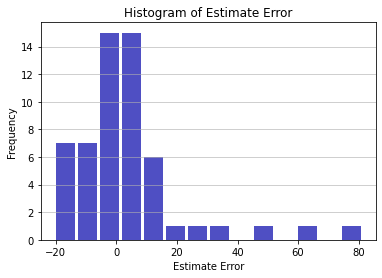

In [226]:
n, bins, patches = plt.hist(x=opt.puts['estimate_error'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

From the Histogram above it can be seen that most of the errors are close to 0%.

# Greeks 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [4]:
def Binary_put(S, K, T, r, vol):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T)) 
    option_value = np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) #calculates Binary Put Option Value 
    
    return option_value 

In [5]:
Binary_put(538.85, 540, 1, 0.0167, 0.4463)

0.5660127036050445

In [6]:
def delta(S, K, T, r, vol):
    
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    delta = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/(vol * S * np.sqrt(T)) 
    
    return delta

In [7]:
delta(538.85, 540, 1, 0.0167, 0.4463) 

0.0016020703384475666

In [8]:
def gamma(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = (np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0)) / ((vol ** 2) * (S ** 2) * np.sqrt(T)) 
    
    return gamma

In [9]:
gamma(538.85, 540, 1, 0.0167, 0, 0.4463) 

1.7040159979865272e-06

In [10]:
def theta(S, K, T, r, q, vol): 
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T)) 
    theta = (r * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)) - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1/(2 * T)) - (r - q)/ (vol * np.sqrt(T))  
    
    return theta 

In [11]:
theta(538.85, 540, 1, 0.0167, 0, 0.4463)

-0.07724211184976

In [12]:
def vega(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T)) 
    vega = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1/vol) 
    
    return vega

In [13]:
vega(538.85, 540, 1, 0.0167, 0, 0.4463) 

0.2208189441734315

In [14]:
def rho(S, K, T, r, q, vol):
    
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    rho = - T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - (T / vol) * np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)
    
    return rho

In [15]:
rho(538.85, 540, 1, 0.0167, 0, 0.4463)

-1.4292883054775156